# Chapter 06 확률변수(Random Variable)

- <a href="#6.1이산확률변수">6.1 이산확률변수</a>
- <a href="#6.2연속확률변수">6.2 연속확률변수</a>
- <a href="#6.3확률변수의평균과분산">6.3 확률변수의 평균과 분산</a>

In [ ]:
%precision 2

## <a name="6.1이산확률변수">6.1 이산확률변수</a>

### 확률변수(Random Variable)
- 표본공간 S안의 원소에 **실수를 대응시키는 함수**를 확률변수라 하며, 보통 X와 같이 대문자로 나타낸다.
- 일정한 **확률로 발생하는 각각의 결과를 수치적 값**으로 표현하는 변수. 
- 시행결과에 따라 값이 결정되는 변수를 나타내는 함수
- **확률변수 예제:** 
    - 동전 두 번 던지기 : 표본공간 {HH, HT, TH, TT} **→ {0, 1, 2 }**
    - 동전 세 번 던지기 : 앞면이 나온 횟수를 확률변수 𝑋라 하면, 표본공간 {HHH, HHT, HTH, THH, HTT, THT, TTH, TTT} **→ {0, 1, 2, 3 }**

### 확률변수의 종류
#### *이산확률변수(Discrete Random Variable)
- 확률변수 X의 원소의 수(치역)가 유한개이거나 셀수 있는 경우의 확률변수
- $X(Ω) = \{1,2,3,4...\}$
#### *연속확률변수(Continuous random variable)
- 어떤 연속하는 범위 안에서 모든 실숫값을 가지는 확률변수 X
- $X(Ω) = \{x \in R, 0 \leq x \leq 100 \}$

### 확률분포함수
- 확률변수의 값에 대한 확률분포를 나타내는 함수
- 확률이 어디에 어느 정도 분포되어 있는가를 수학적으로 명시하고 명확하게 전달하기 위한 도구가 바로 확률분포함수다.

### 확률분포함수의 종류
- **확률질량함수(PMF:Probability mass function)** : 이산확률변수의 확률분포
- **확률밀도함수(PDF:Probability density function)** : 연속확률변수의 확률분포

------------------------------------

### 이산확률변수(Discrete Random Variable)

### [실습]  예제 6-1: 확률변수X의 상태공간(Sx) 구하기
주사위를 두 번 반복하여 던지는 시행에서 두 분의 차의 절대값을  확률변수 X라고 할 때,  X의 상태공간은?

#### 확률변수X의 상태공간(Sx) 구하기

In [ ]:
X = list()
for i in range(1, 7):
    for j in range(1, 7):    # 주사위를 두번 던지는 시행
        X.append( abs(i-j) )  # abs() 절대값 나타내는 함수
x_set = set(X)
print(f'확률변수 X 상태공간 Sx = {x_set}')

In [ ]:
import itertools

D = list(range(1,7))  # [1,2,3,4,5,6]
outcomes = list( itertools.product(D, repeat=2) ) # 주사위를 두번 던지는 시행
outcomes

x_set = { abs(x1-x2) for x1, x2 in outcomes } # 두 눈의 차의 절대값을 나타내는 확률변수의 상태공간
print(f'상태공간 Sx = {x_set}')

### 확률질량함수 (Probability Mass Function: PMF) 
이산확률변수의 분포를 나타내는 함수

### [실습] 예제 6-3:주사위를 두 번 반복 시행해서 두 눈의 차의 절대값: 확률변수 X 

#### 확률변수 X

In [ ]:
'''
주사위 2번 던져 두 눈의 차의 절대값을 확률변수 X라할 때
'''
import itertools

D = list(range(1,7))
outcomes = list( itertools.product(D, repeat=2) ) # 주사위를 두번 던지는 시행

x_set = { abs(x1-x2) for x1, x2 in outcomes } # 두 눈의 차의 절대값을 나타내는 확률변수의 상태공간
X = list( set(x_set) )    # 프로그램에서 사용을 편하기 하기 위해 집합데이터를 리스트데이터로 변경함

print(f'#확률변수 X 상태공간: {x_set}')      

**(a). 확률변수 X의 확률질량함수 f(x)**

In [ ]:
# 확률변수 X의 확률질량함수
def f(x) :
    freq = [(x1, x2) for x1, x2 in outcomes if abs(x1-x2)== x ]  
    print(x,':', freq)
    return  len(freq) / len(outcomes)

prob = [f(x) for x in x_set ]  
prob


# 확률변수 X와 X의 확률질량함수를 딕셔너리로 만들면
P_X = dict(zip(X, prob))
print(f'#확률변수 X의 확률질량함수 f(x) = {P_X} ')
print(f'#확률의 합: {sum(prob)}')

- **확률변수가 취할 수 있는 값과 확률의 대응 그래프**

In [ ]:
def draw_probability(X, Y): 
    import matplotlib.pyplot as plt

    plt.rcParams['font.family'] = 'Malgun Gothic' #폰트: 맑은 고딕으로 설정 
    plt.rcParams['axes.unicode_minus'] = False    #그래프축 값 마이너스 표시

    plt.bar(X, Y, zorder=1)  # zorder: 그래프 그리기 순서. 큰 수가 가장 나중에 그려짐
    plt.scatter(X, Y, c='r', zorder=2)
    for x, y in  zip(X, Y):
        plt.text(x, y, (x,round(y,2)))

    plt.xlabel("확률변수X")
    plt.ylabel("확률")
    plt.grid()
    plt.show()

draw_probability(X, prob)   # draw_probability(P_X.keys(), P_X.values())

#### # 확률 구하기

In [ ]:
# 확률 구하기
print(f'#(b) 두 눈의 차의 절대값이 3일 확률: { f(3)}')
print(f'#(c) 두 눈의 차의 절대값이 2 이상 4 이하일 확률: { sum([f(x) for x in X if x>=2 and x<=4]) }')
print(f'#(d) 두 눈의 차의 절대값이 4 이상일 확률: { sum([f(x) for x in X if x>=4]) }')

### [실습] 확률질량함수와 확률 구하기
동전을 네 번 반복하여 던지는 시행에서 앞면이 나온 횟수를 확률변수 X라 할 때

(a). 확률변수 X의 확률질량함수  

In [ ]:
'''
동전 던지기 4번 앞면이 나온 횟수
'''
import itertools

# 1.확률변수 X 상태공간
outcomes = list(itertools.product({'H', 'T'}, repeat=4)) # 동전던지기 경우의 수
x_set = {c.count('H') for c in outcomes }       # 앞면(H)의 수 상태공간
X = list(set(x_set))                            # 확률변수 X
print(f'#확률변수 X 상태공간: {x_set}')

  
# 2.확률변수 X의 확률질량함수
def f(x) :
    freq = [ c for c in outcomes if c.count('H')== x ]  
    return  len(freq) / len(outcomes)

prob = [f(x) for x in X ]  
prob


# 확률변수 X와 X의확률질량함수를 딕셔너리로 만들면
P_X = dict(zip(X, prob))
print(f'#확률변수 X의 확률질량함수 f(x) = {P_X} ')


# 확률변수와 확률 그래프로 나타내기
# draw_probability(X, prob)


# 확률 구하기
print(f'#(b) 2일 확률: {f(2)}')
print(f'#(c) 2이상일 확률: { sum([f(x) for x in X if x>=2]) }')
print(f'#(d) 3이하일 확률: { sum([f(x) for x in X if x<=3]) }')

### 이산확률변수 분포함수

동전 두 번 던지기에서 앞면이 나온 횟수를 확률변수 X라 할 때

In [ ]:
'''
동전 던지기 2번 앞면이 나온 횟수
'''
import itertools

# 1.확률변수 X의 상태공간
outcomes = list(itertools.product({'H', 'T'}, repeat=2)) # 동전던지기 경우의 수
x_set = {c.count('H') for c in outcomes }       # 앞면(H)의 수 상태공간
X = list(set(x_set))                            # 확률변수 X
print(f'#확률변수 X 상태공간: {x_set}')
  
# 2.확률변수 X의 확률질량함수
def f(x) :
    if x in x_set:
        freq = [ c for c in outcomes if c.count('H')== x ]  
        return  len(freq) / len(outcomes)
    else:
        0


# 3.확률분포함수(F(x)): 누적분포함수
def F(x):
    return sum([f(u) for u in X if u <= x])


# 확률누적분포 그래프로 그려보기
def graph_F(X, probs, s_probs):
    # 그래프로 그리기
    import matplotlib.pyplot as plt

    plt.bar(X, probs, zorder=2)
    plt.bar(X, s_probs, zorder=1)
    for x, y in  zip(X, s_probs):
        plt.text(x, y, (x,round(y,2)) )
    plt.grid()
    plt.show()

# 4.확률분포함수 누적확률
probs = [f(x) for x in X]
s_probs = [F(x) for x in X]
print(f'#확률변수X의 확률질량함수: {dict(zip(X, probs))}')
print(f'#확률변수X의 확률분포함수: {dict(zip(X, s_probs))}')

graph_F(X, probs, s_probs) # 확률누적분포 그래프로 그려보기

### [실습] 예제 6-4 : 분포함수 
주사위 두 번 던지기, 확률변수X: 두 눈의 차의 절대값 

In [ ]:
'''
주사위 2번 던져 두 눈의 차의 절대값을 확률변수 X라할 때
'''
import itertools

# 1.확률변수 X의 상태공간
D = list(range(1,7))
outcomes = list( itertools.product(D, repeat=2) ) # 주사위를 두번 던지는 시행

x_set = { abs(x1-x2) for x1, x2 in outcomes } # 두 눈의 차의 절대값을 나타내는 확률변수의 상태공간
X = list( set(x_set) )    # 프로그램에서 사용을 편하기 하기 위해 집합데이터를 리스트데이터로 변경함
print(f'#확률변수 X 상태공간: {x_set}')   


# 2.확률질량함수 f(x)
def f(x) :
    freq = [(x1, x2) for x1, x2 in outcomes if abs(x1-x2)== x ]  
    return  len(freq) / len(outcomes)


# 3.확률분포함수 F(x)
def F(x):
    return sum([f(u) for u in X if u <= x])


# 4.확률분포함수 누적확률
probs = [f(x) for x in X]
s_probs = [F(x) for x in X]
print(f'#확률변수X의 확률질량함수: {dict(zip(X, probs))}')
print(f'#확률변수X의 확률분포함수: {dict(zip(X, s_probs))}')

graph_F(X, probs, s_probs) # 확률누적분포 그래프로 그려보기


# 확률 구하기
print('#확률 구하기')
#(b) P(X=3)절대값이 3 이하가 되는 확률
print(f'#(b) P(X=3)     : { F(3) - F(2) } ')

#(c) P(2<=X<=4)
print(f'#(c) P(2<=X<=4) : { F(4) - F(2) + probs[2] } ')

#(d) P(X>=4) = 1 - P(X<=3)
print(f'#(d) P(X>=4)    : { 1-F(3) } ')

-------

## <a name="6.2연속확률변수">6.2 연속확률변수</a>


### 연속확률변수 (Continuous Random Variable)

### 성인 남성의 키 데이터
- 데이터출처: https://sizekorea.kr/
- 최근 데이터 참고: https://kosis.kr/statHtml/statHtml.do?orgId=350&tblId=DT_35007_N130

In [ ]:
import pandas as pd

# 자신의 PC에서 '키데이터.csv'파일 위치에 맞게 지정
df = pd.read_csv('data/키데이터.csv', encoding='utf-8')
df

#20대 이상 남성 데이터 가져오기
# df_man = df.query("성별=='남' and 나이>=20 and 나이<30")
df_man = df.query("성별=='남' and 나이>=20")
df_man['키'] = df_man['키']//10
df_man

In [ ]:
df_man.describe()  # 해당 데이터의 기술통계량
# df_man.mean()
# df_man.median()
# df_man.mode()

#### 히스토그램 구간: '키' 로 지정

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic' #폰트: 맑은 고딕으로 설정 
plt.rcParams['axes.unicode_minus'] = False    #그래프축 값 마이너스 표시

# 히스토그램 구간 만들기
plt.hist(df_man['키'], bins=10)
plt.title("히스토그램으로 나타낸 키 데이터 분포")
plt.xlabel("키구간")
plt.ylabel("도수")
plt.show()

In [ ]:
# seaborn 라이브러리로 히스토그램 그리기
# KDE: kernel density estimate
import seaborn as sns 
sns.histplot(df_man['키'], kde=True, bins=10)

### 그래프 여러 개 하나로 나타내기

In [ ]:
w = 10
h = 6
fig = plt.figure(figsize=(w, h))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

ax1.hist(df_man['키'], bins=10, edgecolor='w') 
ax2.hist(df_man['키'], bins=20, edgecolor='w')
ax3.hist(df_man['키'], bins=30, edgecolor='w') 
ax4.hist(df_man['키'], bins=40, edgecolor='w')
plt.show()

### 확률밀도함수(Probability Density Function)
- 연속확률변수 X가 특정한 구강네 포함될 확률을 나타내 주는 함수
- $\int_{-\infty}^{\infty} f(x)dx = 1 $

#### 그래프에 수평선/수직선 그리기
- Axes.hlines(self, y, xmin, xmax, colors=None, linestyles='solid', label='', *, data=None, **kwargs)
- Axes.vlines(self, x, ymin, ymax, colors=None, linestyles='solid', label='', *, data=None, **kwargs)
- Axes.fill_between(self, x, y1, y2=0, where=None, interpolate=False, step=None, **kwargs)

### [실습] 예제 6-7: 연속확률변수의 확률밀도함수 구하기
- $f(x) = kx: 0\leq x \leq 4$, $0:  otherwise$

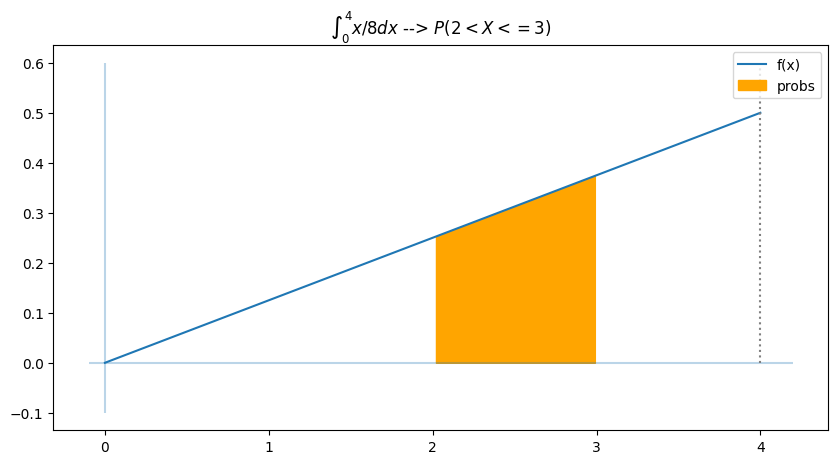

면적--> P(2<X<=3) : (0.3125, 3.469446951953614e-15) 


In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))


# 1.연속확률변수X
X_range = np.array([0, 4]) # 실수로 나타내기 위해서


# 2.확률밀도함수(fx)
def f(x):
    if X_range[0] <= x <= X_range[1]:
        return (1/8*x)
    else:
        return 0

    
# 3.그래프로 구간 나타내기  
X = np.linspace(X_range[0], X_range[1], 100) #0~4를 100개의 구간으로 나누기
Y = [f(x) for x in X]
# print(f'X : {X}')
# print(f'Y : {Y}')


plt.plot(X, Y, label='f(x)')
plt.hlines(0, -0.1, 4.2, alpha=0.3)
plt.vlines(0, -0.1, 0.6, alpha=0.3)
plt.vlines(X.max(), 0, 0.6, linestyles=':', color='gray')
# 구간 색칠하기
plt.fill_between(X, Y, where=(X>2) & (X<=3), label='probs', color='orange')
plt.legend()
plt.title('$\int_{0}^{4}x/8dx$ --> $P(2<X<=3)$')
plt.show()


# **확률(면적) 구하기**
from scipy import integrate

print(f'면적--> P(2<X<=3) : {integrate.quad(f, 2, 3)} ')
#결과값: (0.3125, 3.469446951953614e-15)=(적분값, 추정오차)

### [실습] 확률밀도함수의 면적 구하기
- $f(x) = k: 1\leq x \leq 10$, $0:  otherwise$

In [ ]:
from scipy import integrate

print(f'면적--> P(2<X<=3) : {integrate.quad(f, 2, 3)} ')

#### 누적분포함수

In [3]:
# 면적--> P(2<X<=3)
def F(x):
    return integrate.quad(f, -np.inf, x)[0]    #(-np.inf, np.inp: 무한대)

F(3) - F(2)

0.3124999999999945

#### 누적분포함수 그리기

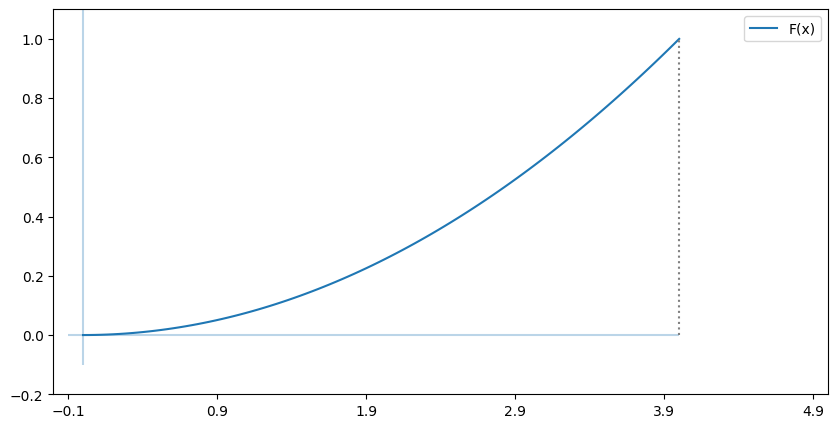

In [4]:
X = np.linspace(X_range[0], X_range[1], 100) #0~4를 100개의 구간으로 나누기
Y = [F(x) for x in X]

plt.figure(figsize=(10,5))
plt.plot(X, Y, label='F(x)')
plt.hlines(0, -0.1, 4, alpha=0.3)
plt.vlines(0, -0.1, 1.1, alpha=0.3)
plt.vlines(X.max(), 0, 1, linestyles=':',color='gray')

plt.xticks(np.arange(-0.1, 5, 1))
plt.xlim(-0.2, 5)
plt.ylim(-0.2, 1.1)
plt.legend()

plt.show()


### [실습] 예제 6-8 : (구간 색칠하기 오류발생함)

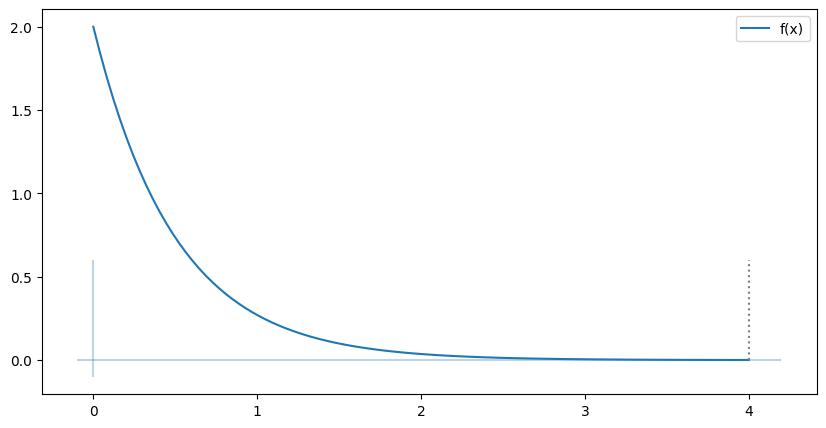

면적--> P(X>2)    : (0.018315638888710205, 9.175589109027242e-09) 
면적--> P(1<X<=2) : (0.1170196443478785, 1.2991790348846178e-15) 


In [5]:
# F(x) = 1 -e^-2x 미분하기
import numpy as np
import matplotlib.pyplot as plt
import sympy
import math

plt.figure(figsize=(10,5))


# 1.연속확률변수X
X_range = np.array([0, 4]) # 실수로 나타내기 위해서


# 2.확률밀도함수(fx)
def f(x):
    return 2*sympy.exp(-2*x)
    #return 2*math.exp(-2*x)
    
# 3.그래프로 구간 나타내기  
X = np.linspace(X_range[0], X_range[1], 100) #0~4를 100개의 구간으로 나누기
Y = [f(x) for x in X]
# print(f'X : {X}')
# print(f'Y : {Y}')

plt.plot(X, Y, label='f(x)')
plt.hlines(0, -0.1, 4.2, alpha=0.3)
plt.vlines(0, -0.1, 0.6, alpha=0.3)
plt.vlines(X.max(), 0, 0.6, linestyles=':', color='gray')
# 구간 색칠하기 (구간 색칠하기 오류발생함)
#plt.fill_between(X, Y, where=(X>1) & (X<=2), label='probs', color='orange')
plt.legend()
plt.show()


# **확률(면적) 구하기**
from scipy import integrate 
print(f'면적--> P(X>2)    : {integrate.quad(f, 2, np.inf)} ') 
print(f'면적--> P(1<X<=2) : {integrate.quad(f, 1, 2)} ')


### [실습] 예제: 확률구하고 그래프로 나타내기 
 - 전체 초등학생의 수는 10만명
 - 평균 키는 140, 표준편차는 5
일 때
 - 무작위로 한 명을 추출할 때, 145<=키<150일 확률은?
 - **참고 모듈**
     - numpy.random.randint(n): 균일분포의 0~n-1사이의 정수 난수 1개 생성
     - numpy.random.rand(m,n) : 0 ~ 1 사이의 균일분포(표준정규분포) 난수를 matrix array(m,n) 생성
     - numpy.random.randn(m,n): 평균 0, 표준편차 1의 가우시안(표준정규분포) 난수를 matrix array(m,n) 생성 


 ##### 1. 평균 140, 표준편차 5인 결과로 10만명의 초등학생 키 데이터 만들기

In [11]:
S, MEAN, STD = 100000, 140, 5
data =  MEAN + np.random.randn(S) * STD
data

array([136.96208524, 148.14769861, 141.98932647, ..., 146.11101606,
       144.85500358, 146.84030161])

In [12]:
data.mean() # 평균

139.99990252225115

In [13]:
data.std()  # 표준편차

4.997765049221735

##### 2. 145~150에 속할 확률 구하기

In [14]:
prob = len([ i for i in data if i >=145 and i<150]) / S
prob

0.13567

##### 3. 그래프로 나타내기

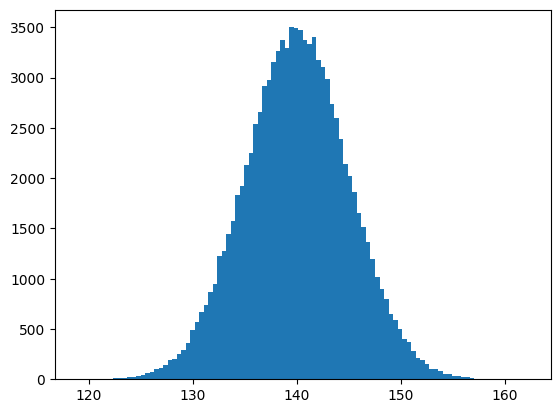

In [15]:
# 히스토그램으로 나타내보기
import matplotlib.pyplot as plt
plt.hist(data,bins=100) # bins의 개수를 10~100개로 변경해 보기
plt.show()

- 확률밀도함수(pdf) 그래프 그리기

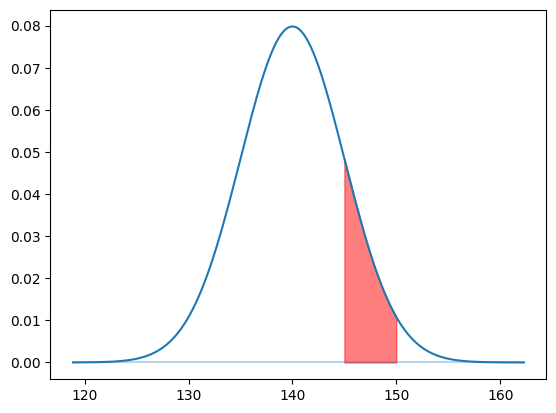

In [17]:
from scipy.stats import norm    # 정규분포관련

data.sort()
X = data
Y = norm.pdf(X, MEAN, STD)   #표준정규분포(norm)형태 확률밀도함수(pdf)의 확률 

plt.plot(X, Y)
plt.hlines(0, min(X), max(X), alpha=0.3)
plt.fill_between(X, Y, where=(X>=145) & (X<150), color='red', alpha=0.5)
plt.show()

-----

---------

## <a name="6.3확률변수의평균과분산">6.3 확률변수의 평균과 분산</a>

### 예제: 상품권과 복권 수, 평균 상금

1. 표로 나타내기

In [19]:
import pandas as pd

data = {'상품권': [100,50,10,0],
        '복권수': [2,8,10,30]}
df = pd.DataFrame(data)
df.columns.name='복권'
df

복권,상품권,복권수
0,100,2
1,50,8
2,10,10
3,0,30


2. 당첨 확률 표시하기 (상대도수)

In [20]:
total = df['복권수'].sum()
df['당첨확률'] = [ cnt/total for cnt in df['복권수'] ]
df               

복권,상품권,복권수,당첨확률
0,100,2,0.04
1,50,8,0.16
2,10,10,0.20
3,0,30,0.60


3. 평균 상금

In [21]:
sum([ val*df['당첨확률'][idx] for idx, val in enumerate(df['상품권']) ])

14.0

In [22]:
sum(df.상품권 * df.당첨확률)

14.0

### 기대값: 확률변수의 평균
- 확률변수를 몇 번이나(무제한) 시행하여 얻어진 실현값의 평균
- 무제한 시행할 수 없으므로 확률변수가 취할 수 있는 값과 확률의 곱의 총합

### [실습] 예제:6-9 (이산확률변수의 평균= 기대값(Ex) )
- **이산확률변수의 기댓값은 표본공간의 원소 $x_i$의 가중평균**

In [53]:
'''
주사위 2번 던져 두 눈의 차의 절대값을 확률변수 X라할 때
'''
import itertools
D = list(range(1,7))


#확률변수 X의 상태공간
outcomes = list( itertools.product(D, repeat=2) ) # 주사위를 두번 던지는 시행
x_set = { abs(x1-x2) for x1, x2 in outcomes } # 두 눈의 차의 절대값을 나타내는 확률변수의 상태공간
X = list( set(x_set) )    # 프로그램에서 사용을 편하기 하기 위해 집합데이터를 리스트데이터로 변경함
print(f'#확률변수 X 상태공간: {x_set}')


#확률변수 X의 확률질량함수
def f(x) :
    freq = [(x1, x2) for x1, x2 in outcomes if abs(x1-x2)== x ]  
    return  len(freq) / len(outcomes)

#확률변수 X의 확률
probs = [f(x) for x in x_set ]  
print(f'#확률변수 X 확률: {probs}')


#확률변수 X의 기대값 E(x)
def E(X):
    return np.sum([x * f(x) for x in X])

print(f'#확률변수 X 기대값 E(X): {E(X)}')

#확률변수 X 상태공간: {0, 1, 2, 3, 4, 5}
#확률변수 X 확률: [0.16666666666666666, 0.2777777777777778, 0.2222222222222222, 0.16666666666666666, 0.1111111111111111, 0.05555555555555555]
#확률변수 X 기대값 E(X): 1.9444444444444446


- **이산확률변수에 대해 DataFrame을 이용하여 기대값 E(x) 구하기**

In [54]:
# 표로 만들어 보기
data = list(zip(X, probs))
df = pd.DataFrame(data, columns=['확률변수','확률'])
df

,확률변수,확률
0,0,0.166667
1,1,0.277778
2,2,0.222222
3,3,0.166667
4,4,0.111111
5,5,0.055556


In [55]:
# 기대값 E(x)
sum(df.확률변수 * df.확률)

1.9444444444444446

In [57]:
#확률변수 X의 기대값 E(x)
def E(X, g=lambda x:x**2):
    return np.sum([x * f(x) for x in X])

E(X, g=lambda x:x**2)

1.9444444444444446

### 분산

In [ ]:
mean = E(X)
np.sum([(x - mean)**2 * f(x) for x in X])

In [ ]:
def V(X, g=lambda x:x):
    mean = E(X, g)
    return np.sum([(g(x) - mean)**2 * f(x) for x in X])

V(X)

In [ ]:
V(X, g=lambda x:2*x+3)

### 표준편차

In [ ]:
V(X)**(1/2)

-------

끝